# Overfitting Figure Generation
We're going to generate `n_points` points distributed along a line, remembering that the formula for a line is $y = mx+b$. Modified (slightly) from [here](https://stackoverflow.com/a/35730618/8068638).

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
n_points = 20
m = 1
b = 0
delta_range = 6
np.random.seed(0)

Now, we need to generate the testing and training "data"

In [3]:
points_x = np.arange(n_points)
training_delta = np.random.uniform(delta_range / -2.0, delta_range / 2.0, size=(n_points))
training_points_y = m*points_x + b + training_delta

testing_points_x = points_x + n_points
testing_delta = np.random.uniform(delta_range / -2.0, delta_range / 2.0, size=(n_points))
testing_points_y = m*testing_points_x + b + testing_delta

We'll overfit by generating a $n$-dimensional polynomial

In [4]:
overfitted = np.poly1d(np.polyfit(points_x, training_points_y, n_points))

/home/dhimmel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


In [5]:
x_space = np.linspace(-(n_points/5), 2*n_points+(n_points/5), n_points*10)
overfitted_x_space = np.linspace(-(n_points/5), 2*n_points+(n_points/5), n_points*10)

In [6]:
y_overfitted = overfitted(x_space)

## Plot it
Colors chosen from [Wong, B. (2011). Points of view: Color blindness. *Nature Methods, 8*(6), 441–441. doi:10.1038/nmeth.1618](doi.org/10.1038/nmeth.1618). I had to do some magic to make the arrays colors play nicely with matplotlib

In [7]:
def rgb_to_np_rgb(r, g, b):
    return (r / 255, g / 255, b / 255) 

orange = rgb_to_np_rgb(230, 159, 0)
blueish_green = rgb_to_np_rgb(0, 158, 115)
vermillion = rgb_to_np_rgb(213, 94, 0)
blue = rgb_to_np_rgb(0, 114, 178)

In [8]:
print(plt.rcParams["figure.figsize"])

[6.0, 4.0]


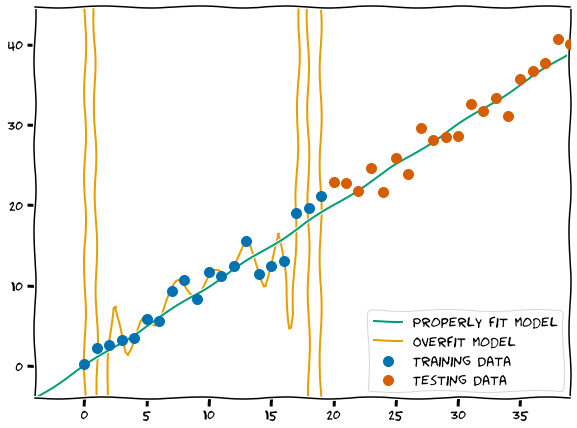

In [9]:
plt.rcParams["figure.figsize"] = (12.8 * 0.75, 9.6 * 0.75)
plt.rcParams['svg.fonttype'] = 'path'
plt.xkcd() # for fun (see https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003858#s12)

plt.scatter(points_x, training_points_y, zorder=3,label="Training Data", s=100, c=[blue])
plt.scatter(testing_points_x, testing_points_y, zorder=3,label="Testing Data", s=100, c=[vermillion])

plt.plot(x_space, m*x_space + b, zorder=2, label="Properly fit model", c=blueish_green)
plt.plot(x_space, y_overfitted, zorder=1, label="Overfit model", c=orange)

plt.xlim(-(n_points/5), max(testing_points_x))
plt.ylim(-(n_points/5), max(testing_points_y)+(n_points/5))
plt.rcParams["figure.figsize"] = [6.4*2, 4.8*2]
plt.title("")
plt.legend(loc=4)
plt.savefig('overfitting.svg', bbox_inches='tight')
plt.savefig('overfitting.png', dpi=150, bbox_inches='tight')